<a href="https://colab.research.google.com/github/IshanRayen/pendulum/blob/main/Double_Pendulum_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Animation and Graphing of a Double Pendulum**

A double pendulum is a mechanical system that mimics normal pendulum but it includes two degrees of freedom. The peculiarity about this system is that the motion of the first and second pendulum is chaotic. For the pendulum, chaos is seen as seemingly random movement that is difficult to predict. The system shows large changes in final movements and pathing based on small arbitrary changes in its initial position. The small initial changes are greatly amplified over time which is what causes this characteristic.


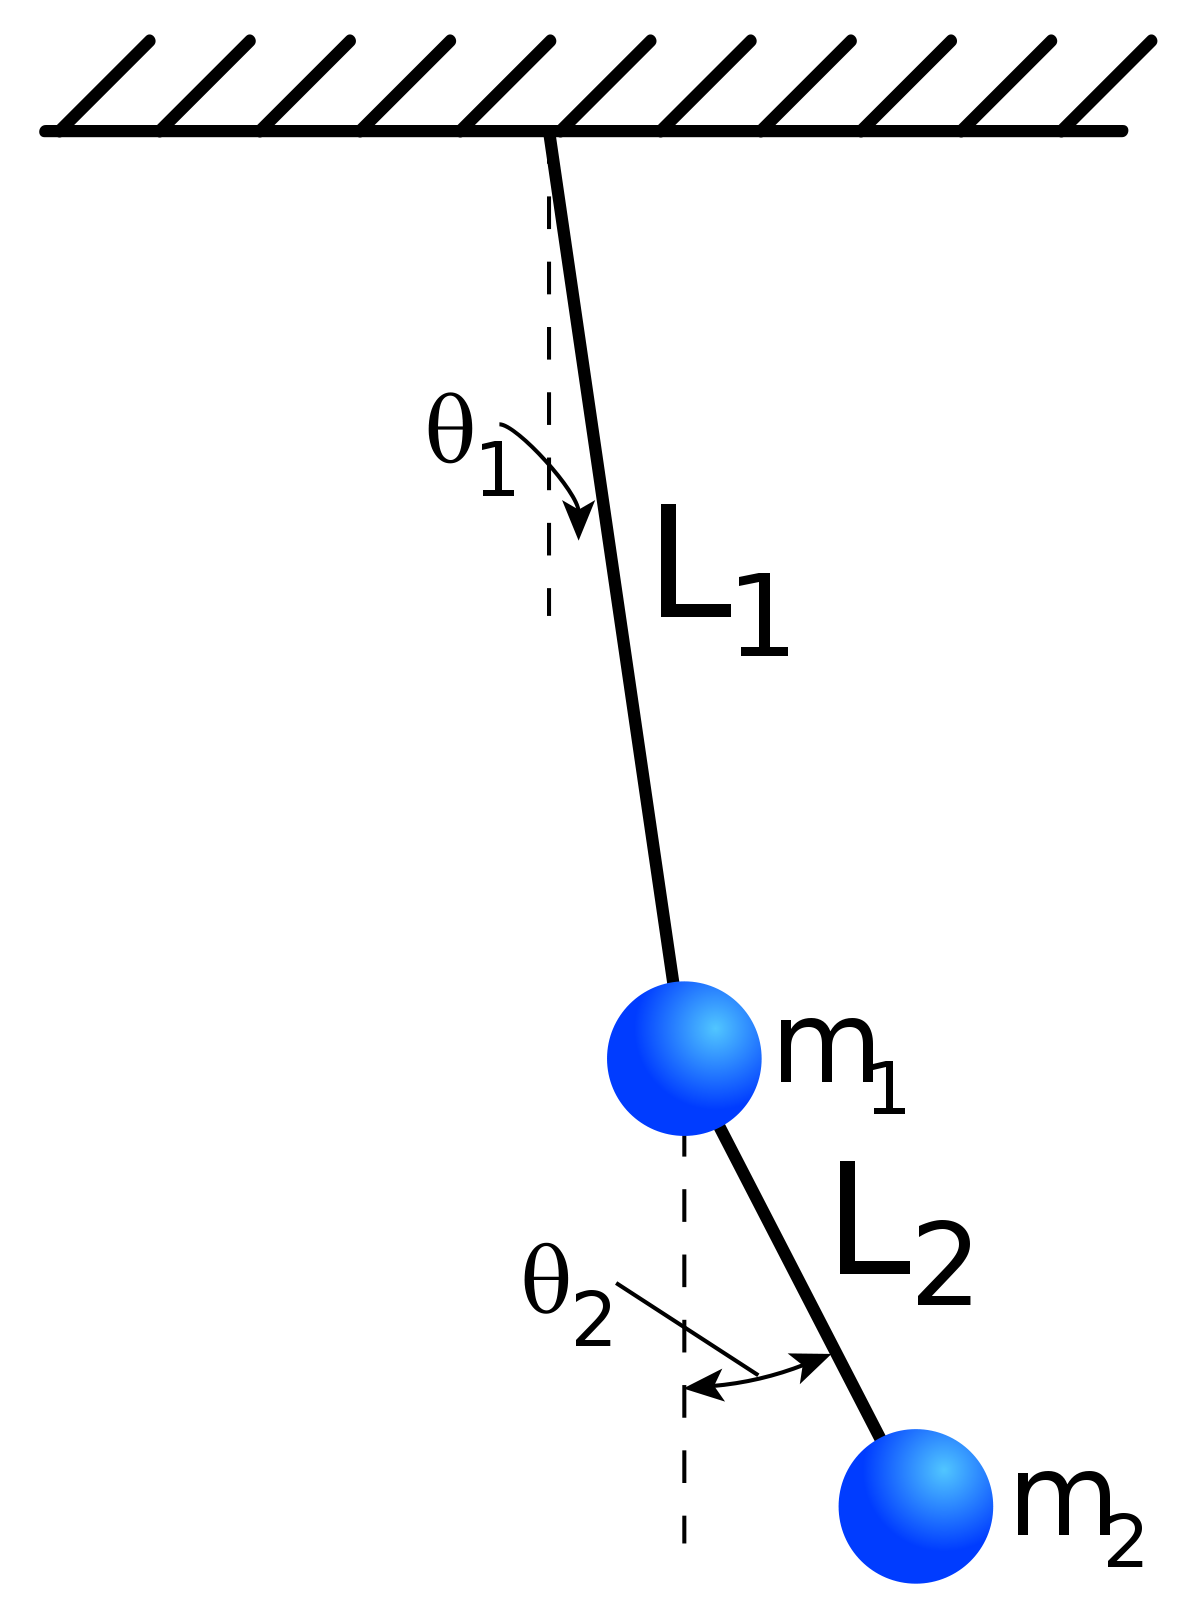

Another peculiarity of the double pendulum is normal modes. The normal mode of a system is a pattern of motion that occurs when all parts of a system are moving with the same frequency and phase. For a double pendulum, the normal modes are when the length and mass of both pendulums are equal and the initial angle of the pendulums are
$\begin{bmatrix}
-2.4\\
3.4
\end{bmatrix}
$and$
\begin{bmatrix}
0.4\\
0.6
\end{bmatrix}$
where all measurements are in radians.

In this project, I solve for the positions of mass 1 and mass 2 given a set of variable initial conditions including: mass of each pendulum, length of each pendulum, gravity, initial angle, initial angular velocity, and time. The final output is a set of x positions and y positions of each mass that is plotted as dots on a two dimensional plane. This is then animated into showing the pathing of the masses. I also model the pathing of the pendulum when it is under the conditions of a normal mode.

For a double pendulum, we know the position of each pendulum with the following equations where the subscript $_1$ refers to the first mass and the subscript $_2$ refers to the second mass and L refers to the length of the string holding the masses.

\$x_1=L_1\sin(\theta_1)$

\$y_1=-L_1\cos(\theta_1)$

\$x_2=x_1+L_2\sin(\theta_2)$

\$y_2=y_1-L_2\cos(\theta_2)$


Since we want to animate this, these position arguments need to be time dependent in order to iterate and recieve a new position after a step in time. For that we can take derivatives with respect to time. This also creates variables that can be used later on.

$\dot{x_1}=L_1\dot{\theta_1}\cos(\theta)$

$\dot{y_1}=L_1\dot{\theta_1}\sin(\theta)$

$\dot{x_2}=L_1\dot{\theta_1}\cos(\theta)+L_2\dot{\theta_2}\cos(\theta_2)$

$\dot{y_2}=L_1\dot{\theta_1}\sin(\theta)+L_2\dot{\theta_2}\sin(\theta_2)$

This problem becomes complex because once there is a small change in motion, the forces acting on each mass changes due to the change in angle and the speed at which another mass is travelling. Since they are connected, it is constantly acting on each other. However, we can use the conservation of energy in this frictionless system to get total energies and forces in terms of the given conditions. We can show potential energy and kinetic energy as seen below where P is potential energy and k is kinetic energy:

$P= m_1y_1g+m_2y_2g$

$K=\frac{1}{2}m_1v_1^{2}+\frac{1}{2}m_2v_2^{2}$

The first order derivative found before can be plugged in as the velocity for each. However the resultant velocity would be needed for kinetic energy. The equations can be given as:

$P=-m_1L_1\cos(\theta_1)g-m_2(L_1\cos(\theta_1+L_2\cos(\theta_2))g$

$K=\frac{1}{2}m_1L_1^2\dot{\theta_1}^2+\frac{1}{2}m_2(L_1^2\dot{\theta_1}^2+L_2^2\dot{\theta_2}^2+2L_1L_2\dot{\theta_1}\dot{\theta_2}\cos(\theta_1-\theta_2))$

For this code, the Euler-Langrange differential equation is used to solve the problem and give the outputs required. Using the potential and the kinetic energies, we can find the Lagrange function and then format it as the Euler-Lagrange equation.

$\mathcal{L}=K-P$

This can be input into the formula below for the Euler-Lagrange Equation

$\frac{\mathrm{d}}{\mathrm{d}t}\left(\frac{\partial\mathcal{L}}{\partial \dot{\theta}}\right) - \frac{\partial \mathcal{L}}{\partial \theta} = 0$

To simplify the equations used in the code, the following variable substituions were made:

$c = \cos($initial angle$_1-$initial angle$_2)$

$s=\sin($initial angle$_1-$initial angle$_2)$


Thus the inputs for the function are seen below. The inputs are variables formatted from the Euler-Lagrange and the outputs are the angles and omegas of both masses in a step progression.

$\frac{(m_2g\sin(angveloc_1)c-m_2s(L_1c(ang_1^2+L_2*ang_2^2)-(m_1+m_2)g\sin(ang_1)}{L_1(m_1+m_2s^2)}$

$\frac{(m_1+m_2)L_1angveloc_1^2s-g\sin(ang_2)+g\sin(ang_1)c+m_2L_2angvelc_2^2sc}{L_2(m_1+m_2s^2)}$

This is run through the function and an ODE solver to get the desired outputs.

In [1]:
from scipy.integrate import odeint
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [13]:
"""
============================Initial Conditions==================================
# """

# All conditions here can be altered. M3 has to equal M1 in order for the normal modes to work
M1 = 3                                                                 #mass 1
M2 = 1                                                                 #mass 2
M3 = M1                                                        #substitute mass
len1 = 2                                        #rope lenght connecting mass 1
len2 = 2                                        #rope lenght connecting mass 2
g = 9.81                                                              #gravity
t = np.linspace(0, 50, 50)                #time array and intervals in between

# Changing the time array (t variable) allows the animations and plots to differ
# A larger number for the second parameter means the simulation runs for longer.
#   A larger third parameter will increase the intervals which will smoothen the
#   animations however this will increase the computing time. Current parameters
#   take ~1 minute total runtime.
# For a longer and smoother animation try (0, 100, 200).

u0 = [np.pi/2, 0, -np.pi/2, 0]              #initial condition for both masses
# u[0] is the initial angle for M1
# u[1] is the initial angular velocity for M1
# u[2] is the initial angle for M2
# u[3] is the initial angular velocity for M2

"""
==========================Function and ODE Solver===============================
"""

# this function takes in the initial condition, time array, masses, lengths, and gravity
def pendy(u,t,M1,M2,len1,len2,g):
    du = np.zeros(4)
    c = np.cos(u[0]-u[2])
    s = np.sin(u[0]-u[2])
    du[0] = u[1]
    du[1] = (M2*g*np.sin(u[2])*c-M2*s*(len1*c*u[1]**2+len2*u[3]**2)-(M1+M2)*g*np.sin(u[0]))/(len1*(M1+M2*s**2))
    du[2] = u[3]
    du[3] = ((M1+M2)*(len1*u[1]**2*s-g*np.sin(u[2])+g*np.sin(u[0])*c)+M2*len2*u[3]**2*s*c)/(len2*(M1+M2*s**2))
    return du

# This returns a du which is the theta and the omega of both masses after a step in time for all times

sol = odeint(pendy, u0, t, args=(M1,M2,len1,len2,g))

# The ODE solver takes in the function, initial condition, and the arguments and
# returns the angles and omegas for each mass

"""
==================================Outputs=======================================
"""

u0 = sol[:,0] #angle of M1
u1 = sol[:,1] #angular velocity of M1
u2 = sol[:,2] #angle of M2
u3 = sol[:,3] #angular velocity of M2

# solutions come out in polar coordinates, this converts them back into
# cartesian coordinates that can be plotted on a 2D graph.
x1 = len1*np.sin(u0);
y1 = -len1*np.cos(u0);
x2 = x1 + len2*np.sin(u2);
y2 = y1 - len2*np.cos(u2);

Text(0, 0.5, 'y Position')

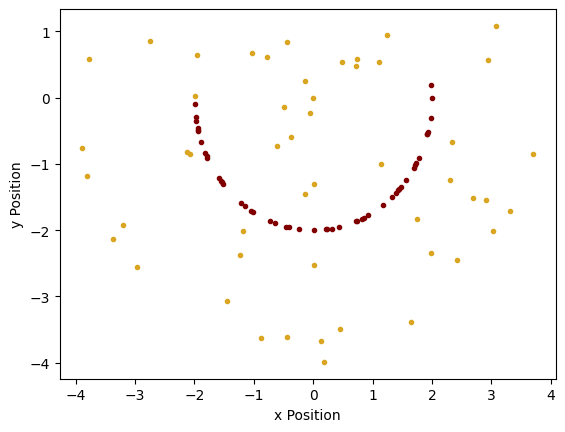

In [3]:

"""
=====================Scatter Plot of Chaos Pendulum=============================
"""
# This plot is faster to run than the animations and can be used as a way to test the functions when making changes
# It plots the position of each mass at a certain time step, but does not show the pathing
# The maroon dots are mass 1 which will always be confined to a circle with the radius of its length
# The dark yellow dots are the second mass which more visually shows the chaotic effects of the system

plt.plot(x1,y1,'.',color = 'maroon')
plt.plot(x2,y2,'.',color = 'goldenrod')
plt.xlabel('x Position')
plt.ylabel('y Position')

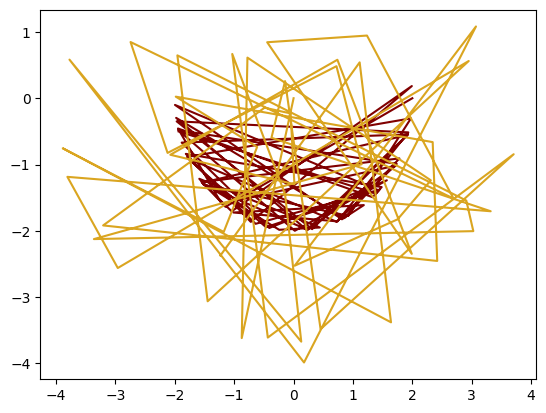

In [4]:
"""
======================Animation of Chaos Pendulum===============================
"""
# This animates the chaos pendulum by using a function and calling it
# The function uses the same inputs as the scatter plot but it connects the points with a line
# With a small time step it is possible to aproximate a pathing of the pendulums

fig, ax = plt.subplots()
line1, = ax.plot(x1, y1, color = "maroon")
line2, = ax.plot(x2, y2, color = "goldenrod")

def update(num, x, y, z, line1, line2):
    line1.set_data(x1[:num], y1[:num])
    line2.set_data(x2[:num], y2[:num])
    return [line1,line2]

ani = animation.FuncAnimation(fig, update, len(x1), fargs=[x1, y1, y2, line1, line2],
                  interval=295, blit=True)
rc('animation', html='jshtml')
ani

The same process is repeated for the normal modes of the pendulum. The conditions require that the both masses have the same mass and length which is why the variable Len2 is exchanged for Len3 in the following functions and parameters. The normal modes also require the initial conditions to change which is hwy instead of referring to the variable u0 it refers to other conditions to change the starting angle.

In [5]:
"""
===============================Normal Mode 1====================================
"""

# Initial condition with the angles changed and velocity at 0
v0 = [-2.4/1000, 0, 3.4/1000, 0]

def normal_pend_one(u,t,M1,M3,len1,len2,g):
    dv = np.zeros(4)
    c = np.cos(u[0]-u[2])
    s = np.sin(u[0]-u[2])
    dv[0] = u[1]
    dv[1] = (M2*g*np.sin(u[2])*c-M3*s*(len1*c*u[1]**2+len2*u[3]**2)-(M1+M3)*g*np.sin(u[0]))/(len1*(M1+M3*s**2))
    dv[2] = u[3]
    dv[3] = ((M1+M3)*(len1*u[1]**2*s-g*np.sin(u[2])+g*np.sin(u[0])*c)+M3*len2*u[3]**2*s*c)/(len2*(M1+M3*s**2))
    return dv

solone = odeint(normal_pend_one, v0, t, args=(M1,M3,len1,len2,g))
"""
========================Outputs for Normal Mode 1===============================
"""
v0 = solone[:,0]
v1 = solone[:,1]
v2 = solone[:,2]
v3 = solone[:,3]

x3 = len1*np.sin(v0);
y3 = -len1*np.cos(v0);
x4 = x3 + len2*np.sin(v2);
y4 = y3 - len2*np.cos(v2);

Text(0, 0.5, 'y Position')

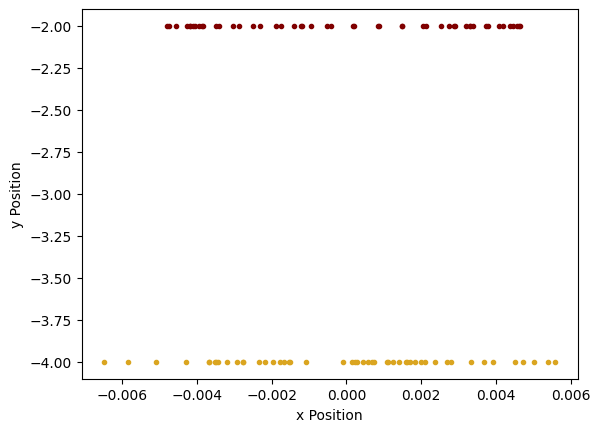

In [6]:
"""
=====================Scatter Plot of Normal Mode 1==============================
"""
# Same arguments for the previous plot apply here as well
plt.plot(x3,y3,'.',color = 'maroon')
plt.plot(x4,y4,'.',color = 'goldenrod')
plt.xlabel('x Position')
plt.ylabel('y Position')

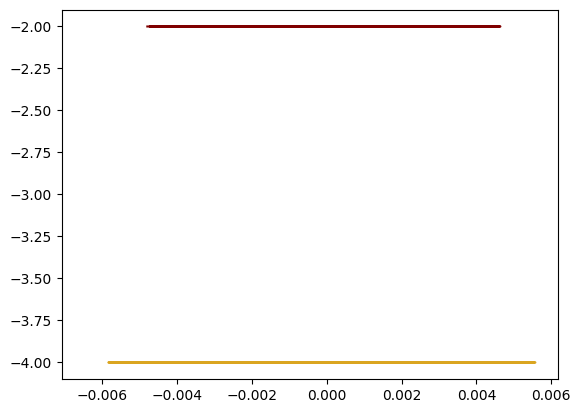

In [7]:
"""
======================Animation of Normal Mode 1===============================
"""
# Same arguments for the previous plot apply here as well

fig, ax = plt.subplots()
line3, = ax.plot(x3, y3, color = "maroon")
line4, = ax.plot(x4, y4, color = "goldenrod")

def updateone(num, x, y, z, line3, line4):
    line3.set_data(x3[:num], y3[:num])
    line4.set_data(x4[:num], y4[:num])
    return [line3,line4]

anione = animation.FuncAnimation(fig, updateone, len(x3), fargs=[x3, y3, y4, line3, line4],
                  interval=295, blit=True)
rc('animation', html='jshtml')
anione

In [8]:
"""
===============================Normal Mode 2====================================
"""

# Changed initial conditions that changes the theta but omega stays 0
j0 = [0.4/1000, 0, 0.6/1000, 0]

def normal_pend_two(u,t,M1,M3,len1,len2,g):
    dv = np.zeros(4)
    c = np.cos(u[0]-u[2])
    s = np.sin(u[0]-u[2])
    dv[0] = u[1]
    dv[1] = (M2*g*np.sin(u[2])*c-M3*s*(len1*c*u[1]**2+len2*u[3]**2)-(M1+M3)*g*np.sin(u[0]))/(len1*(M1+M3*s**2))
    dv[2] = u[3]
    dv[3] = ((M1+M3)*(len1*u[1]**2*s-g*np.sin(u[2])+g*np.sin(u[0])*c)+M3*len2*u[3]**2*s*c)/(len2*(M1+M3*s**2))
    return dv

soltwo = odeint(normal_pend_two, j0, t, args=(M1,M3,len1,len2,g))

"""
========================Outputs for Normal Mode 2===============================
"""

j0 = soltwo[:,0]
j1 = soltwo[:,1]
j2 = soltwo[:,2]
j3 = soltwo[:,3]

x5 = len1*np.sin(j0);
y5 = -len1*np.cos(j0);
x6 = x5 + len2*np.sin(j2);
y6 = y5 - len2*np.cos(j2);

Text(0, 0.5, 'y Position')

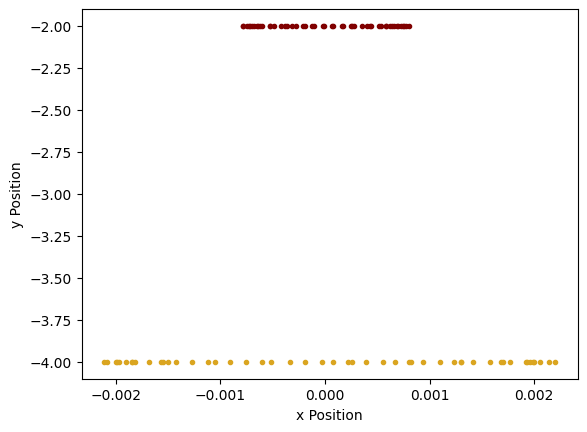

In [9]:
"""
=====================Scatter Plot of Normal Mode 2==============================
"""
plt.plot(x5,y5,'.',color = 'maroon')
plt.plot(x6,y6,'.',color = 'goldenrod')
plt.xlabel('x Position')
plt.ylabel('y Position')

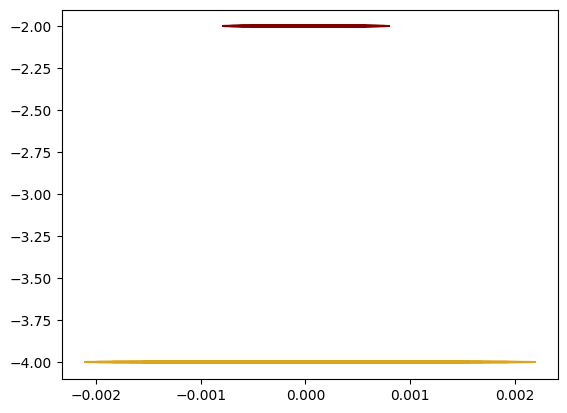

In [10]:
"""
======================Animation of Normal Mode 2===============================
"""

fig, ax = plt.subplots()
line5, = ax.plot(x5, y5, color = "maroon")
line6, = ax.plot(x6, y6, color = "goldenrod")

def updatetwo(num, x, y, z, line5, line6):
    line5.set_data(x5[:num], y5[:num])
    line6.set_data(x6[:num], y6[:num])
    return [line5,line6]

anitwo = animation.FuncAnimation(fig, updatetwo, len(x5), fargs=[x5, y5, y6, line5, line6],
                  interval=295, blit=True)
rc('animation', html='jshtml')
anitwo

The project was able to show that it is possible to plot and animate the positions of a double pendulum on a graph. It was also possible to show the normal modes of a pendulum in theoretical terms and seeing it plotted out.